In [50]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGen():
    def __init__(self,row:int,col:int,random_start = False):
        self.row = row
        self.col = col
        self.random_start = random_start

        self.player = [0,0]
        self.trap = []
        self.star = []
        self.terminal= [self.row-1,self.col-1]
        
        
        self.step_reward = -1
        self.star_reward = 10 
        self.trap_reward = -10 
        
        self._set_up_maze()
    
    def _set_up_maze(self):
        """ maze has no walls """
        self.maze = np.zeros([self.row,self.col])
        
    def get_state_info(self,loc):
        """ return the state info of that loc"""
        
        info = []
        
        if loc[0]<0 or loc[0]>= self.row or loc[1]<0 or loc[1] >= self.col:
            info.append('out')
        if loc[0] == 0:
            info.append("left edge")
        if loc[0] == self.row - 1:
            info.append("right edge")
        if loc[1] == 0:
            info.append("down edge")
        if loc[1] == self.col -1:
            info.append("up edge")
        if loc in self.trap:
            info.append("trap")
        if loc in self.star:
            info.append("star")
        if loc == self.terminal:
            info.append("terminal")
        if loc == self.player:
            info.append("player")

        return info
    
    def check_reward(self,loc):
        """ return current loc reward """
        info = self.get_state_info(loc)
        if "star" in info:
            return self.star_reward
        if "trap" in info:
            return self.trap_reward

        return self.step_reward
    
    def check_action_reward(self,action,loc):
        if action == "up":
            loc_1 = [loc[0],loc[1]+1]
        if action == "down":
            loc_1 = [loc[0],loc[1]-1]
        if action == "left":
            loc_1 = [loc[0]-1,loc[1]]
        if action == "right":
            loc_1 = [loc[0]+1,loc[1]]
        assert (0 <= loc_1[0] < self.row ) & (0 <= loc_1[1] < self.col)
        return self.check_reward(loc_1)



    def set_grid(self,player = None,star = None,trap = None,terminal = None):
        """ 
            this script will replace player, and terminal.
            this script will add star and trap
            required format [x,y]
            default one terminal state
            
                                            """
        if player is not None:
            self.player = player
        if star is not None:
            self.star.append(star)
        if trap is not None:
            self.trap.append(trap)
        if terminal is not None:
            self.terminal = terminal
    
    def set_reward(self, step_reward = -1, star_reward = 10, trap_reward = -10):
        """
            this script will replace rewards set
                                                """
        self.step_reward = step_reward
        self.star_reward = star_reward
        self.trap_reward = trap_reward
        

    def _avaiable_actions(self,loc):
        """ list avaiable actions """
        
        actions = ['up','down','left','right']
        info = self.get_state_info(loc)
        
        if "up edge" in info:
            actions.remove("up")
        if "down edge" in info:
            actions.remove("down")
        if "left edge" in info:
            actions.remove("left")
        if "right edge" in info:
            actions.remove("right")
            
        return actions

        
    def render(self,figsize = (10,5)):

        plt.figure(figsize=figsize)
        plt.imshow(self.maze, interpolation='none', origin='lower', cmap='Greys')
 
        for star in self.star:
            plt.plot(star[0], star[1], 'y*', mec='none', markersize=17)
        for trap in self.trap:
            plt.plot(trap[0], trap[1], 'rX', mec='none', markersize=17)

        plt.plot(self.terminal[0], self.terminal[1], 'D', mec='none', markersize=17)
        plt.plot(self.player[0], self.player[1], 'bo', mec='none', markersize=8)
        plt.xlim(-0.5, self.row - 0.5)
        plt.ylim(-0.5, self.col - 0.5)
        plt.xticks(np.arange(0.5,self.row-0.5,step = 1),np.arange(self.row))
        plt.yticks(np.arange(0.5,self.col-0.5,step = 1),np.arange(self.col))
        plt.grid(True)

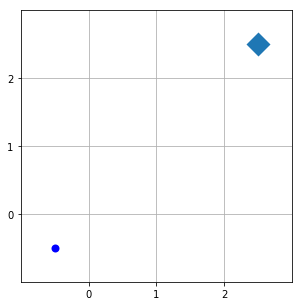

In [51]:
maze = MazeGen(4,4)
maze.render()

In [52]:
maze.get_state_info([3,3])

['right edge', 'up edge', 'terminal']

In [53]:
maze._avaiable_actions([3,3])

['down', 'left']

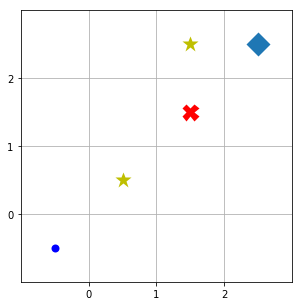

In [54]:
maze.set_grid(star=[1,1])
maze.set_grid(star=[2,3])
maze.set_grid(trap=[2,2])
maze.render()

In [55]:
maze.get_state_info([2,2])

['trap']

In [56]:
maze._avaiable_actions([2,2])

['up', 'down', 'left', 'right']

In [57]:
maze.check_reward([2,2])

-10

In [58]:
maze.check_reward([1,1])

10